In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
!pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 887.3/887.3 kB 15.5 MB/s eta 0:00:00


In [3]:
!pip install roboflow

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 80.9/80.9 kB 4.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 kB 5.3 MB/s eta 0:00:00
  Attempting uninstall: idna
    Found existing installation: idna 3.10
    Uninstalling idna-3.10:
      Successfully uninstalled idna-3.10


In [4]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="VreuB9v0i7rfJf5hZFBI")
project = rf.workspace("shree-wvrb5").project("neural_ocean-szwkz")
version = project.version(1)
dataset = version.download("yolov8")

loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to Neural_Ocean-1 in yolov8:: 100%|██████████| 10266/10266 [00:02<00:00, 4104.35it/s]


Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


In [5]:
import yaml

with open(f"{dataset.location}/data.yaml", 'r') as f:
    dataset_yaml = yaml.safe_load(f)
dataset_yaml["train"] = "../train/images"
dataset_yaml["val"] = "../valid/images"
dataset_yaml["test"] = "../test/images"
with open(f"{dataset.location}/data.yaml", 'w') as f:
    yaml.dump(dataset_yaml, f)

In [6]:
from ultralytics import YOLO

# Load the model
model = YOLO('yolov8n.pt')  # You can choose a different model version if needed

# Train the model
model.train(data='/content/Neural_Ocean-1/data.yaml', epochs=25,imgsz=640)  # Adjust the path and epochs as needed


100%|██████████| 6.25M/6.25M [00:00<00:00, 76.9MB/s]


Ultralytics 8.3.36 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=/content/Neural_Ocean-1/data.yaml, epochs=25, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, sho

100%|██████████| 755k/755k [00:00<00:00, 14.8MB/s]


Overriding model.yaml nc=80 with nc=15

                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      7360  ultralytics.nn.modules.block.C2f             [32, 32, 1, True]             
  3                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  4                  -1  2     49664  ultralytics.nn.modules.block.C2f             [64, 64, 2, True]             
  5                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  6                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  7                  -1  1    295424  ultralytic

100%|██████████| 5.35M/5.35M [00:00<00:00, 67.7MB/s]


AMP: checks passed ✅


train: Scanning /content/Neural_Ocean-1/train/labels... 3626 images, 0 backgrounds, 0 corrupt: 100%|██████████| 3626/3626 [00:01<00:00, 1933.51it/s]


train: New cache created: /content/Neural_Ocean-1/train/labels.cache
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))


A new version of Albumentations is available: 1.4.21 (you have 1.4.20). Upgrade using: pip install -U albumentations. To disable automatic update checks, set the environment variable NO_ALBUMENTATIONS_UPDATE to 1.
val: Scanning /content/Neural_Ocean-1/valid/labels... 1000 images, 0 backgrounds, 0 corrupt: 100%|██████████| 1000/1000 [00:01<00:00, 838.47it/s]


val: New cache created: /content/Neural_Ocean-1/valid/labels.cache
Plotting labels to runs/detect/train/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.000526, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/detect/train
Starting training for 25 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/25      2.24G      1.452      3.377       1.63         32        640: 100%|██████████| 227/227 [01:15<00:00,  3.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:12<00:00,  2.65it/s]


                   all       1000       1891      0.556      0.212      0.171      0.108

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/25      2.34G      1.449       2.54      1.601         44        640: 100%|██████████| 227/227 [01:14<00:00,  3.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:08<00:00,  3.60it/s]


                   all       1000       1891       0.72      0.256      0.246      0.143

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/25      2.22G      1.464      2.367      1.602         40        640: 100%|██████████| 227/227 [01:12<00:00,  3.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:09<00:00,  3.31it/s]


                   all       1000       1891      0.722      0.227      0.249       0.15

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/25      2.43G      1.428      2.186      1.561         33        640: 100%|██████████| 227/227 [01:13<00:00,  3.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:10<00:00,  3.11it/s]


                   all       1000       1891      0.594       0.28       0.29      0.176

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/25      2.23G      1.403      2.025      1.539         27        640: 100%|██████████| 227/227 [01:14<00:00,  3.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:07<00:00,  4.14it/s]


                   all       1000       1891      0.643      0.291      0.318      0.193

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/25      2.35G      1.389      1.912      1.521         42        640: 100%|██████████| 227/227 [01:11<00:00,  3.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:10<00:00,  3.04it/s]


                   all       1000       1891      0.687      0.339      0.367      0.229

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/25      2.21G      1.353      1.828      1.501         39        640: 100%|██████████| 227/227 [01:11<00:00,  3.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:07<00:00,  4.05it/s]


                   all       1000       1891      0.681      0.313      0.341      0.211

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/25      2.34G      1.361      1.743      1.502         36        640: 100%|██████████| 227/227 [01:16<00:00,  2.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:09<00:00,  3.31it/s]


                   all       1000       1891       0.74      0.354      0.393      0.235

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/25      2.34G      1.317      1.678      1.474         35        640: 100%|██████████| 227/227 [01:11<00:00,  3.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:09<00:00,  3.53it/s]


                   all       1000       1891      0.725      0.364      0.401      0.251

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/25      2.22G      1.302      1.572      1.451         92        640: 100%|██████████| 227/227 [01:16<00:00,  2.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:07<00:00,  4.07it/s]


                   all       1000       1891      0.763      0.343      0.388      0.251

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/25      2.28G      1.294      1.567      1.456         35        640: 100%|██████████| 227/227 [01:15<00:00,  3.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:10<00:00,  3.03it/s]


                   all       1000       1891      0.584      0.376      0.397      0.254

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/25      2.32G      1.283      1.528       1.45         46        640: 100%|██████████| 227/227 [01:10<00:00,  3.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:08<00:00,  3.70it/s]


                   all       1000       1891      0.675      0.417      0.447      0.283

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/25      2.28G      1.263       1.47       1.43         49        640: 100%|██████████| 227/227 [01:10<00:00,  3.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:10<00:00,  3.13it/s]


                   all       1000       1891      0.681      0.411      0.459      0.286

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/25      2.28G      1.252      1.404      1.412         49        640: 100%|██████████| 227/227 [01:14<00:00,  3.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:10<00:00,  3.15it/s]


                   all       1000       1891      0.647      0.464       0.49      0.314

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/25      2.32G      1.228      1.366      1.404         58        640: 100%|██████████| 227/227 [01:09<00:00,  3.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:08<00:00,  3.58it/s]


                   all       1000       1891      0.581      0.416      0.457      0.294
Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/25       2.3G      1.199      1.215      1.423         20        640: 100%|██████████| 227/227 [01:10<00:00,  3.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:13<00:00,  2.35it/s]


                   all       1000       1891      0.677      0.456       0.51      0.326

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/25      2.23G      1.167      1.153        1.4         10        640: 100%|██████████| 227/227 [01:10<00:00,  3.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:11<00:00,  2.88it/s]


                   all       1000       1891      0.691      0.409      0.477      0.305

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/25      2.21G      1.151      1.107      1.393         22        640: 100%|██████████| 227/227 [01:09<00:00,  3.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:07<00:00,  4.18it/s]

                   all       1000       1891      0.622      0.495      0.539      0.345



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/25       2.2G      1.126      1.052      1.374         34        640: 100%|██████████| 227/227 [01:15<00:00,  3.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:09<00:00,  3.27it/s]


                   all       1000       1891      0.638      0.492      0.541      0.351

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/25      2.23G      1.121      1.022      1.367         29        640: 100%|██████████| 227/227 [01:06<00:00,  3.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:10<00:00,  2.98it/s]

                   all       1000       1891      0.664      0.498      0.566      0.369



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/25       2.3G      1.101     0.9747      1.346         18        640: 100%|██████████| 227/227 [01:07<00:00,  3.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:09<00:00,  3.55it/s]

                   all       1000       1891      0.684      0.512       0.59      0.385



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/25       2.3G      1.089     0.9504      1.346         36        640: 100%|██████████| 227/227 [01:11<00:00,  3.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:08<00:00,  3.97it/s]

                   all       1000       1891      0.683      0.506      0.581      0.378



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/25       2.2G       1.07     0.9167      1.326         14        640: 100%|██████████| 227/227 [01:10<00:00,  3.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:08<00:00,  3.87it/s]

                   all       1000       1891      0.564      0.595      0.611      0.393



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/25      2.23G      1.051     0.9036      1.311         17        640: 100%|██████████| 227/227 [01:07<00:00,  3.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:10<00:00,  2.97it/s]

                   all       1000       1891      0.725      0.524      0.612      0.395



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/25      2.32G      1.038     0.8824      1.309         15        640: 100%|██████████| 227/227 [01:09<00:00,  3.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:10<00:00,  3.17it/s]

                   all       1000       1891      0.571      0.602      0.624      0.403



25 epochs completed in 0.574 hours.
Optimizer stripped from runs/detect/train/weights/last.pt, 6.3MB
Optimizer stripped from runs/detect/train/weights/best.pt, 6.3MB

Validating runs/detect/train/weights/best.pt...
Ultralytics 8.3.36 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 3,008,573 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:11<00:00,  2.71it/s]


                   all       1000       1891       0.57      0.603      0.623      0.403
                  Mask         77         90      0.867       0.65      0.798      0.557
                   can         18         20      0.576        0.5      0.511      0.219
             cellphone         61         71      0.903      0.986      0.985      0.853
           electronics         27         40      0.584       0.75      0.696      0.394
               gbottle         36         82      0.457      0.756       0.69      0.459
                 glove         37         55      0.816      0.782      0.841      0.671
                 metal         10         22      0.138     0.0455     0.0937     0.0453
                  misc         48         51      0.425      0.451      0.468      0.295
                   net        146        148      0.703      0.846      0.863      0.593
                  pbag        290        330      0.791      0.961      0.965      0.818
               pbottl

ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7f26fdf71180>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,   

In [7]:
import os
os.environ["LANG"] = "en_US.UTF-8"
os.environ["LC_ALL"] = "en_US.UTF-8"




In [8]:
import subprocess

command = [
    "yolo",
    "task=detect",
    "mode=predict",
    "model=/content/runs/detect/train/weights/best.pt",
    "conf=0.25",
    "source=/content/Neural_Ocean-1/test/images"
]

subprocess.run(command, check=True)


CompletedProcess(args=['yolo', 'task=detect', 'mode=predict', 'model=/content/runs/detect/train/weights/best.pt', 'conf=0.25', 'source=/content/Neural_Ocean-1/test/images'], returncode=0)

In [9]:

metrics = model.val()  # Runs evaluation on validation set
print(metrics)  # Outputs metrics like mAP, precision, and recall


Ultralytics 8.3.36 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 3,008,573 parameters, 0 gradients, 8.1 GFLOPs


val: Scanning /content/Neural_Ocean-1/valid/labels.cache... 1000 images, 0 backgrounds, 0 corrupt: 100%|██████████| 1000/1000 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 63/63 [00:11<00:00,  5.43it/s]


                   all       1000       1891      0.571      0.603      0.624      0.404
                  Mask         77         90      0.881      0.657      0.811      0.558
                   can         18         20      0.578        0.5      0.511      0.219
             cellphone         61         71      0.905      0.986      0.985      0.852
           electronics         27         40      0.586       0.75      0.698      0.398
               gbottle         36         82      0.462      0.756       0.69      0.457
                 glove         37         55      0.814      0.782      0.841      0.671
                 metal         10         22      0.136     0.0455     0.0936     0.0431
                  misc         48         51      0.424      0.451      0.468      0.295
                   net        146        148      0.703      0.846      0.863      0.593
                  pbag        290        330      0.793      0.961      0.965      0.819
               pbottl

In [10]:
results = model('/content/Neural_Ocean-1/test/images/1bc7-iudfmpmn7245599_jpg.rf.9e82cb1bad4da997bcfae62227ff26c7.jpg')  # Replace with a path to your test image
for result in results:
    result.plot()  # This will display each image with detections




image 1/1 /content/Neural_Ocean-1/test/images/1bc7-iudfmpmn7245599_jpg.rf.9e82cb1bad4da997bcfae62227ff26c7.jpg: 640x640 1 glove, 1 net, 10.4ms
Speed: 3.7ms preprocess, 10.4ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 640)


In [11]:
from google.colab.patches import cv2_imshow


image 1/1 /content/Neural_Ocean-1/test/images/66b85ac2-5d1b-4783-b0fa-4f8adcda51a5_jpg.rf.95333a328f9c252cb83443dff4565a1a.jpg: 640x640 3 Masks, 1 pbag, 1 pbottle, 1 plastic, 9.7ms
Speed: 6.6ms preprocess, 9.7ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 640)


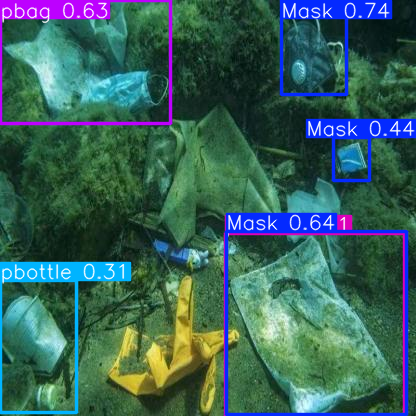

In [12]:
# Load the model to inference on test images
from ultralytics import YOLO
model = YOLO('/content/runs/detect/train/weights/best.pt')
results = model('/content/Neural_Ocean-1/test/images/66b85ac2-5d1b-4783-b0fa-4f8adcda51a5_jpg.rf.95333a328f9c252cb83443dff4565a1a.jpg')  # predict on an image
res_plotted = results[0].plot()
cv2_imshow(res_plotted)


image 1/1 /content/Neural_Ocean-1/test/images/gloves_in_the_ocean10_jpg.rf.c04ad4be3c3b15d801e157cca1dd2968.jpg: 640x640 2 gloves, 7.4ms
Speed: 2.4ms preprocess, 7.4ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


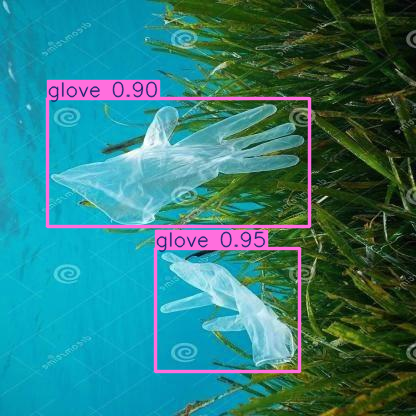

In [13]:
# Load the model to inference on test images
from ultralytics import YOLO
model = YOLO('/content/runs/detect/train/weights/best.pt')
results = model('/content/Neural_Ocean-1/test/images/gloves_in_the_ocean10_jpg.rf.c04ad4be3c3b15d801e157cca1dd2968.jpg')  # predict on an image
res_plotted = results[0].plot()
cv2_imshow(res_plotted)


image 1/1 /content/Neural_Ocean-1/test/images/istockphoto-1254710473-170667a_jpg.rf.009339f07c4348e305c7b015b7b954ae.jpg: 640x640 1 Mask, 8.7ms
Speed: 3.1ms preprocess, 8.7ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


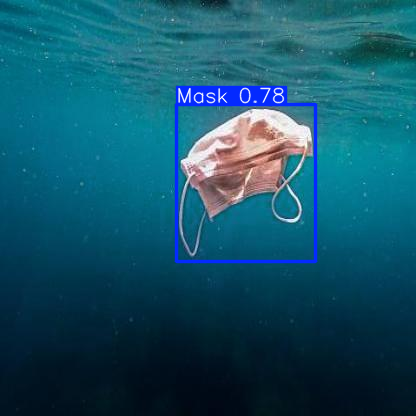

In [15]:
# Load the model to inference on test images
from ultralytics import YOLO
model = YOLO('/content/runs/detect/train/weights/best.pt')
results = model('/content/Neural_Ocean-1/test/images/istockphoto-1254710473-170667a_jpg.rf.009339f07c4348e305c7b015b7b954ae.jpg')  # predict on an image
res_plotted = results[0].plot()
cv2_imshow(res_plotted)


image 1/1 /content/Neural_Ocean-1/test/images/uwg_g-1093__fliph_jpg.rf.470eddeb970bcb90fa2af1e9b6143c38.jpg: 640x640 1 pbottle, 10.8ms
Speed: 2.9ms preprocess, 10.8ms inference, 2.6ms postprocess per image at shape (1, 3, 640, 640)


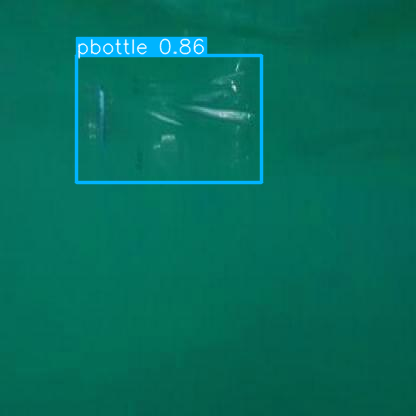

In [16]:
# Load the model to inference on test images
from ultralytics import YOLO
model = YOLO('/content/runs/detect/train/weights/best.pt')
results = model('/content/Neural_Ocean-1/test/images/uwg_g-1093__fliph_jpg.rf.470eddeb970bcb90fa2af1e9b6143c38.jpg')  # predict on an image
res_plotted = results[0].plot()
cv2_imshow(res_plotted)


image 1/1 /content/Neural_Ocean-1/test/images/uwg_g-1175_jpeg_jpg.rf.baf20b559d5a71dab15ba842e84639ad.jpg: 640x640 3 tires, 8.3ms
Speed: 2.6ms preprocess, 8.3ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


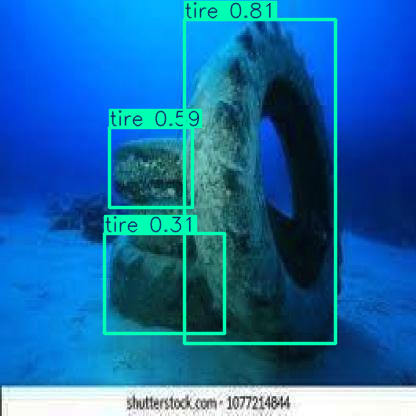

In [18]:
# Load the model to inference on test images
from ultralytics import YOLO
model = YOLO('/content/runs/detect/train/weights/best.pt')
results = model('/content/Neural_Ocean-1/test/images/uwg_g-1175_jpeg_jpg.rf.baf20b559d5a71dab15ba842e84639ad.jpg')  # predict on an image
res_plotted = results[0].plot()
cv2_imshow(res_plotted)


image 1/1 /content/Neural_Ocean-1/test/images/uwg_g-379_jpg.rf.f8c021ba215e87ebacb20cef5ebec928.jpg: 640x640 1 cellphone, 14.5ms
Speed: 3.3ms preprocess, 14.5ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)


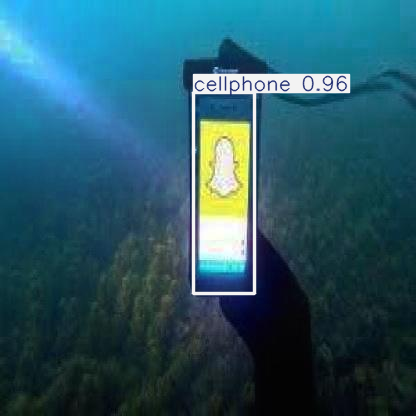

In [19]:
# Load the model to inference on test images
from ultralytics import YOLO
model = YOLO('/content/runs/detect/train/weights/best.pt')
results = model('/content/Neural_Ocean-1/test/images/uwg_g-379_jpg.rf.f8c021ba215e87ebacb20cef5ebec928.jpg')  # predict on an image
res_plotted = results[0].plot()
cv2_imshow(res_plotted)